Real-Estate-Price-Prediction

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [109]:
data = pd.read_csv(r"D:\WORK\datascience\practice\Real-Estate-Price-Prediction\Real_Estate.csv")
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [111]:
data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [112]:
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [113]:
data.corr()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


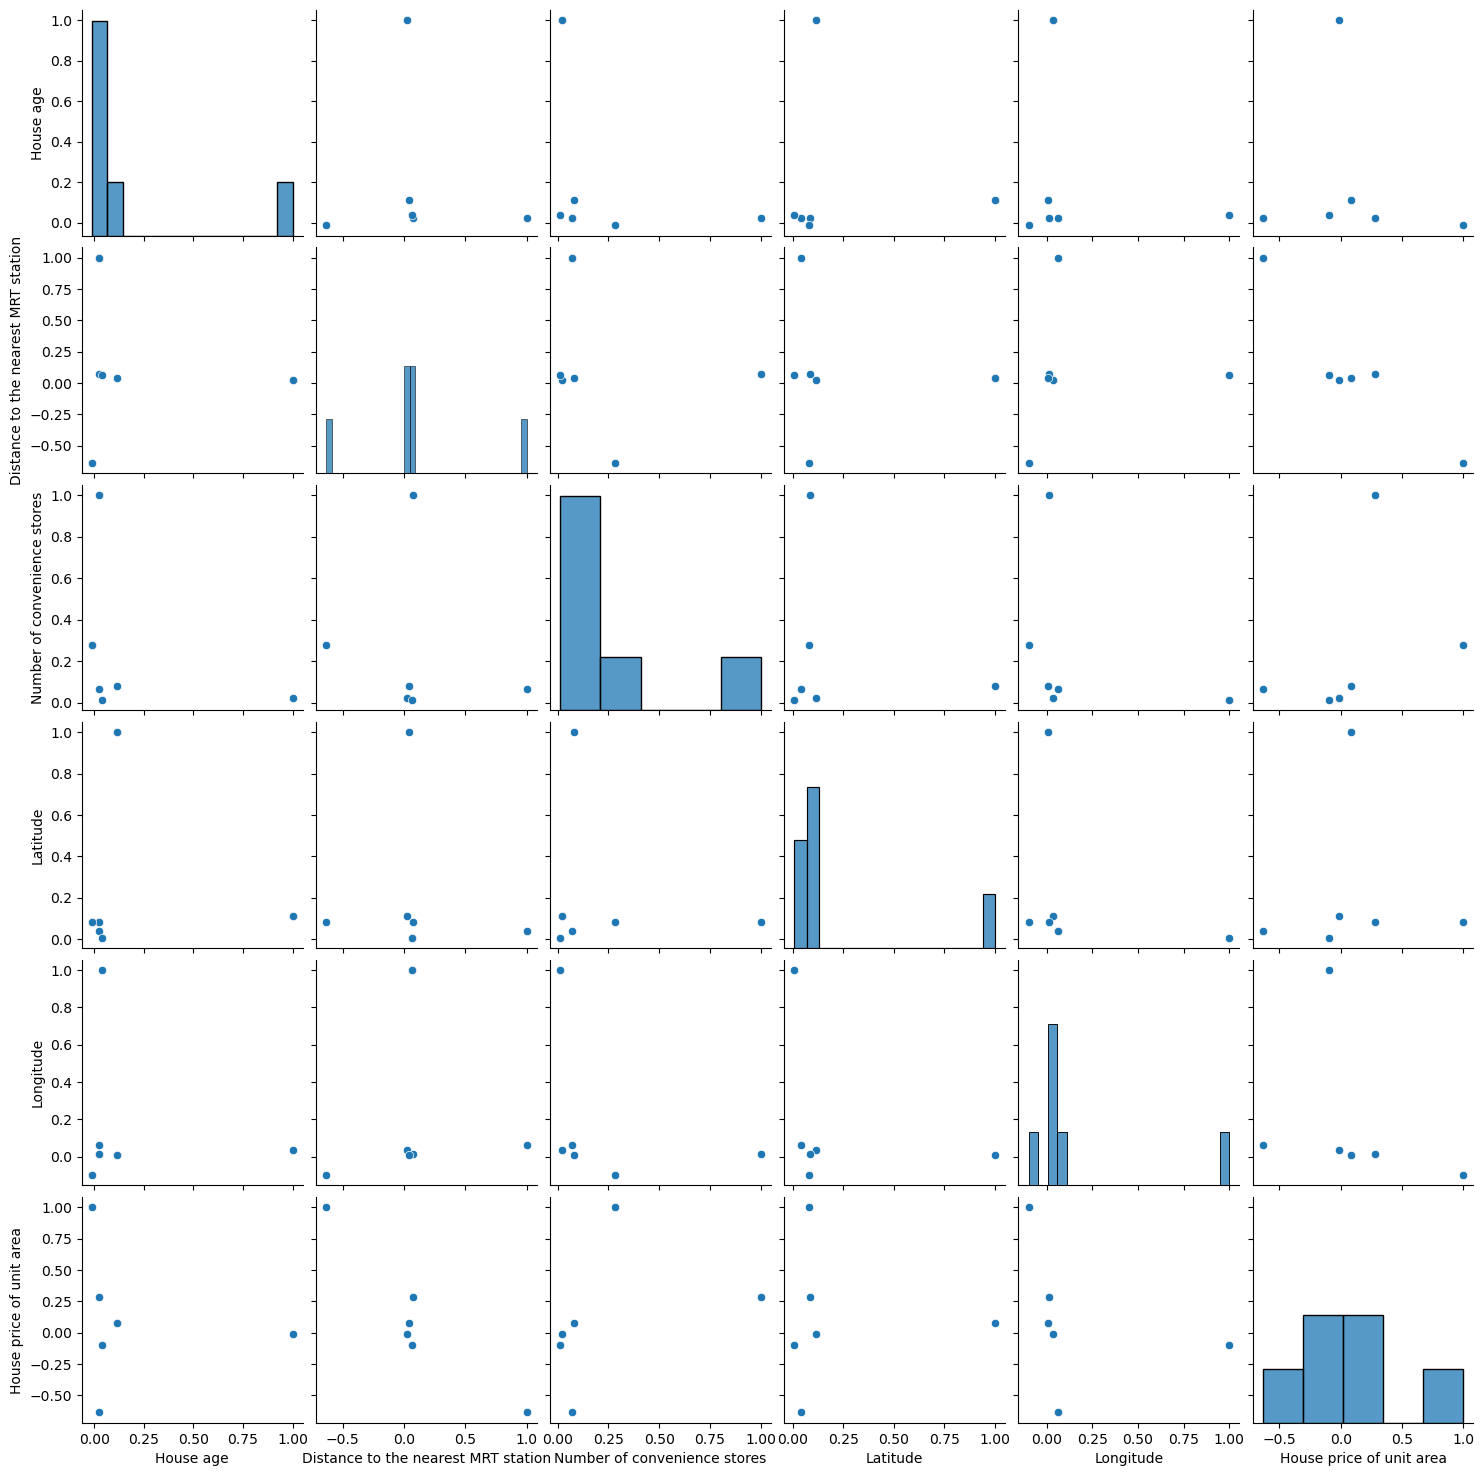

In [114]:
sns.pairplot(data.corr())

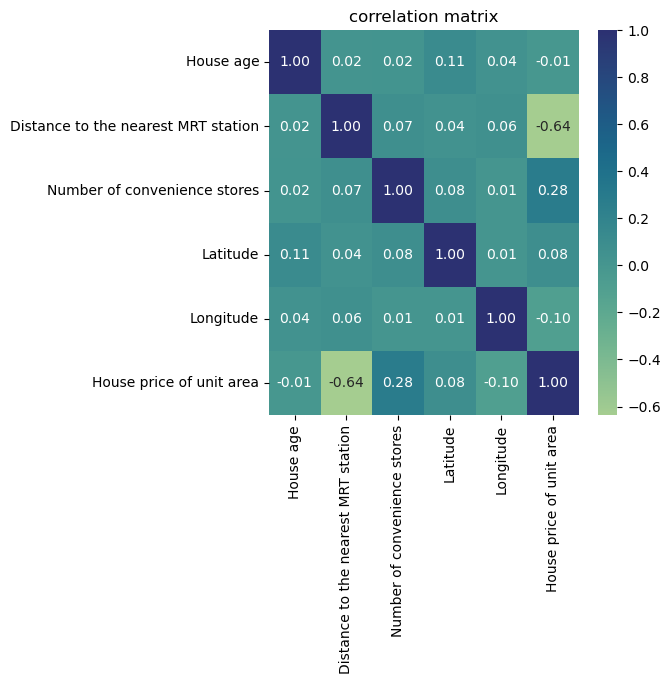

In [115]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,cmap='crest',fmt='.2f')
plt.title('correlation matrix')
plt.xticks(rotation=90)
plt.show()

EDA

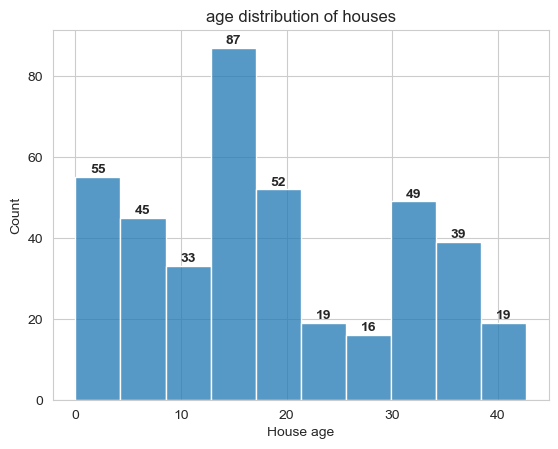

In [119]:

sns.histplot(data=data['House age'],bins=10)
sns.set_style('darkgrid')
counts, barheight = np.histogram(data['House age'],bins=10)

for i in range(len(counts)):
    plt.text((barheight[i]+barheight[1+i])/2,counts[i]+1,str(counts[i]),ha='center',fontweight='bold')

plt.title('age distribution of houses')
plt.show()


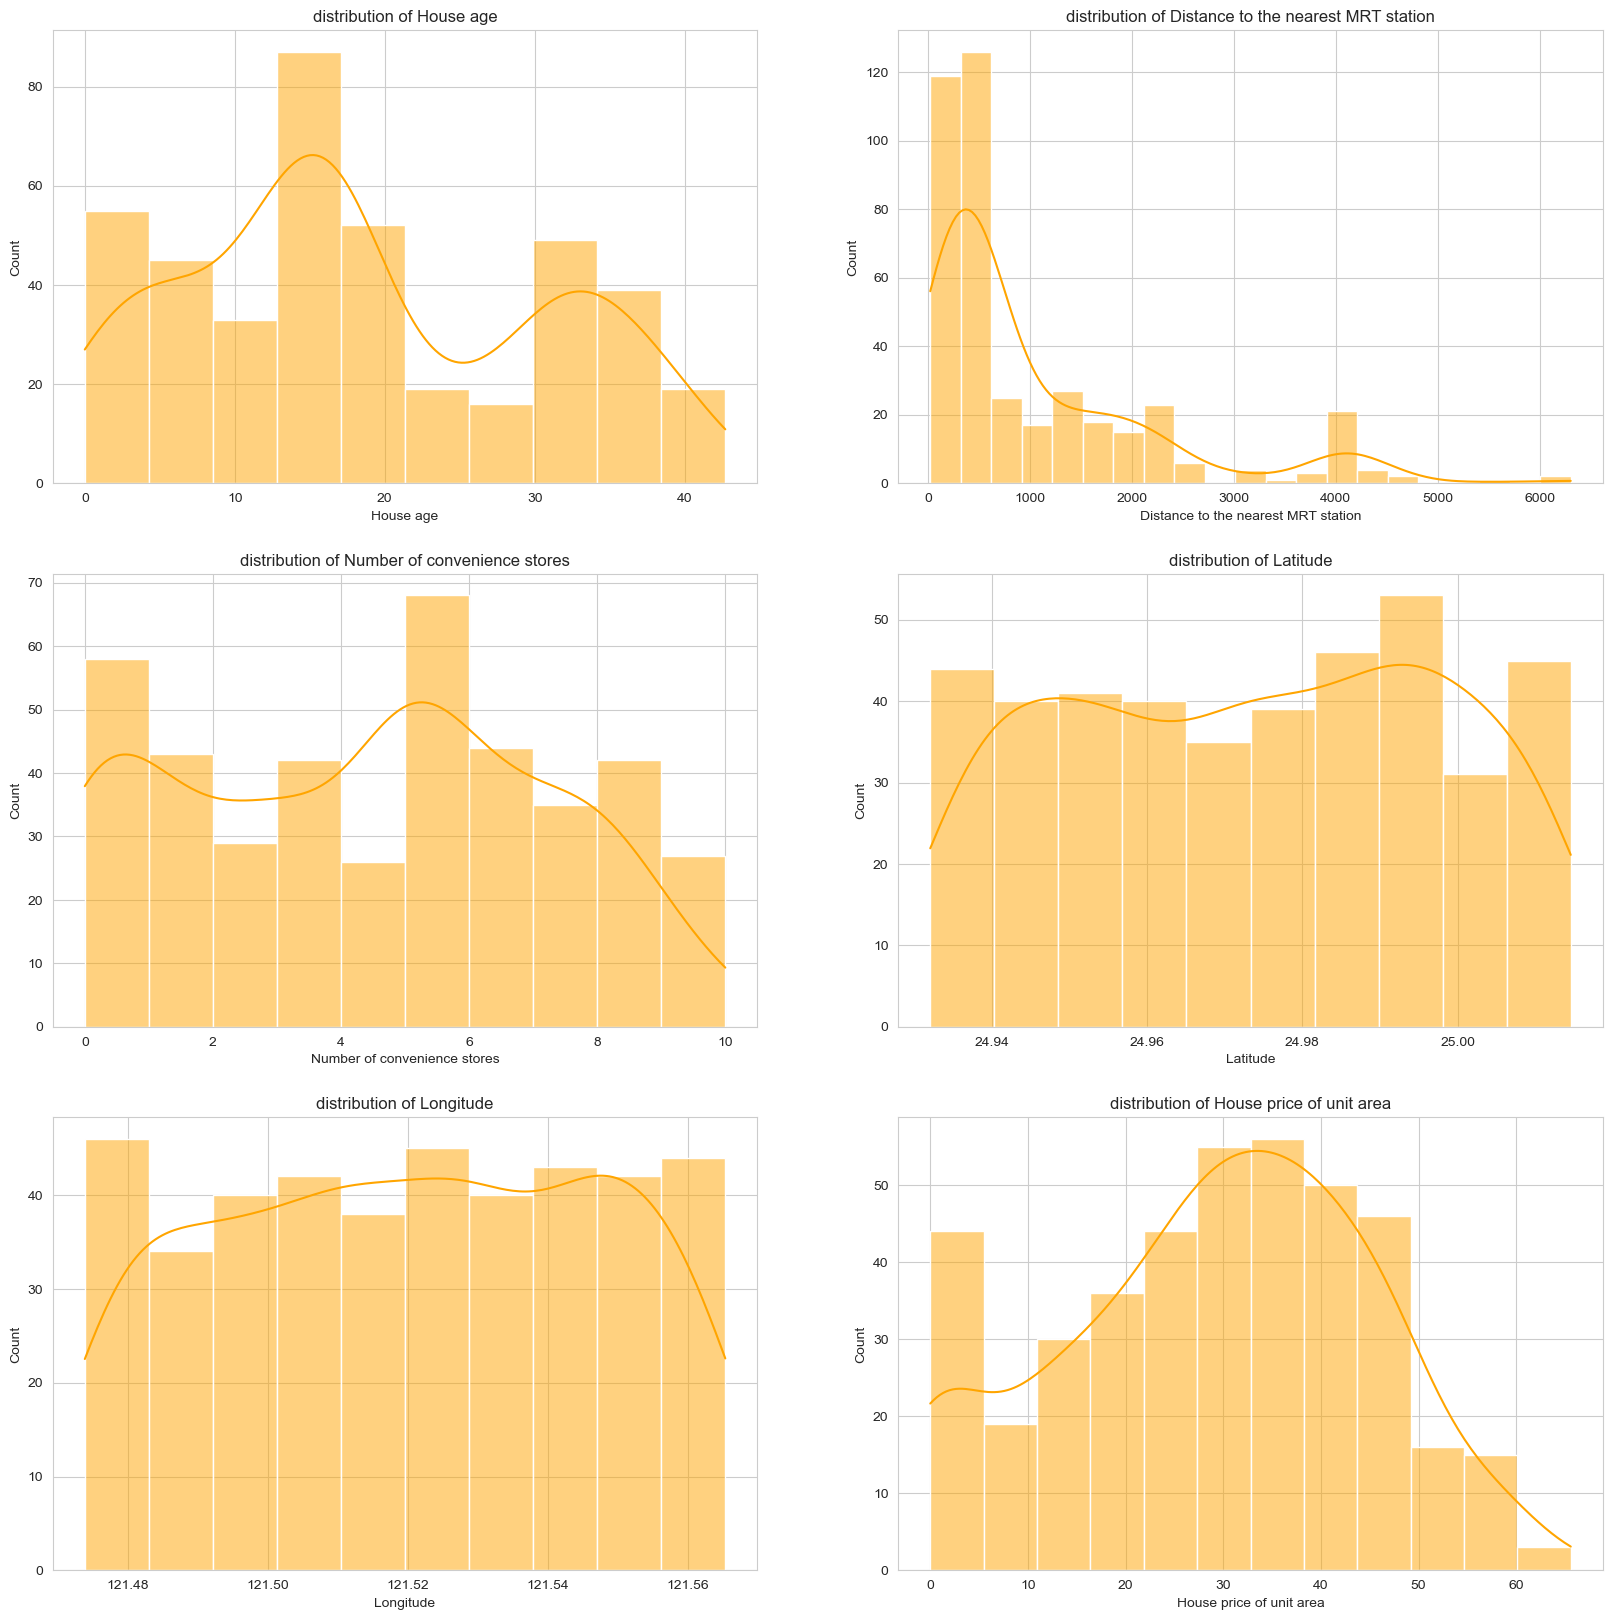

In [127]:
char = ['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']


sns.set_style('whitegrid')

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(20,20))

axes = axes.flatten()

for i,col in enumerate(char):
    sns.histplot(data[col],kde=True,ax=axes[i],color='orange')
    axes[i].set_title(f'distribution of {col}')
    
plt.show()

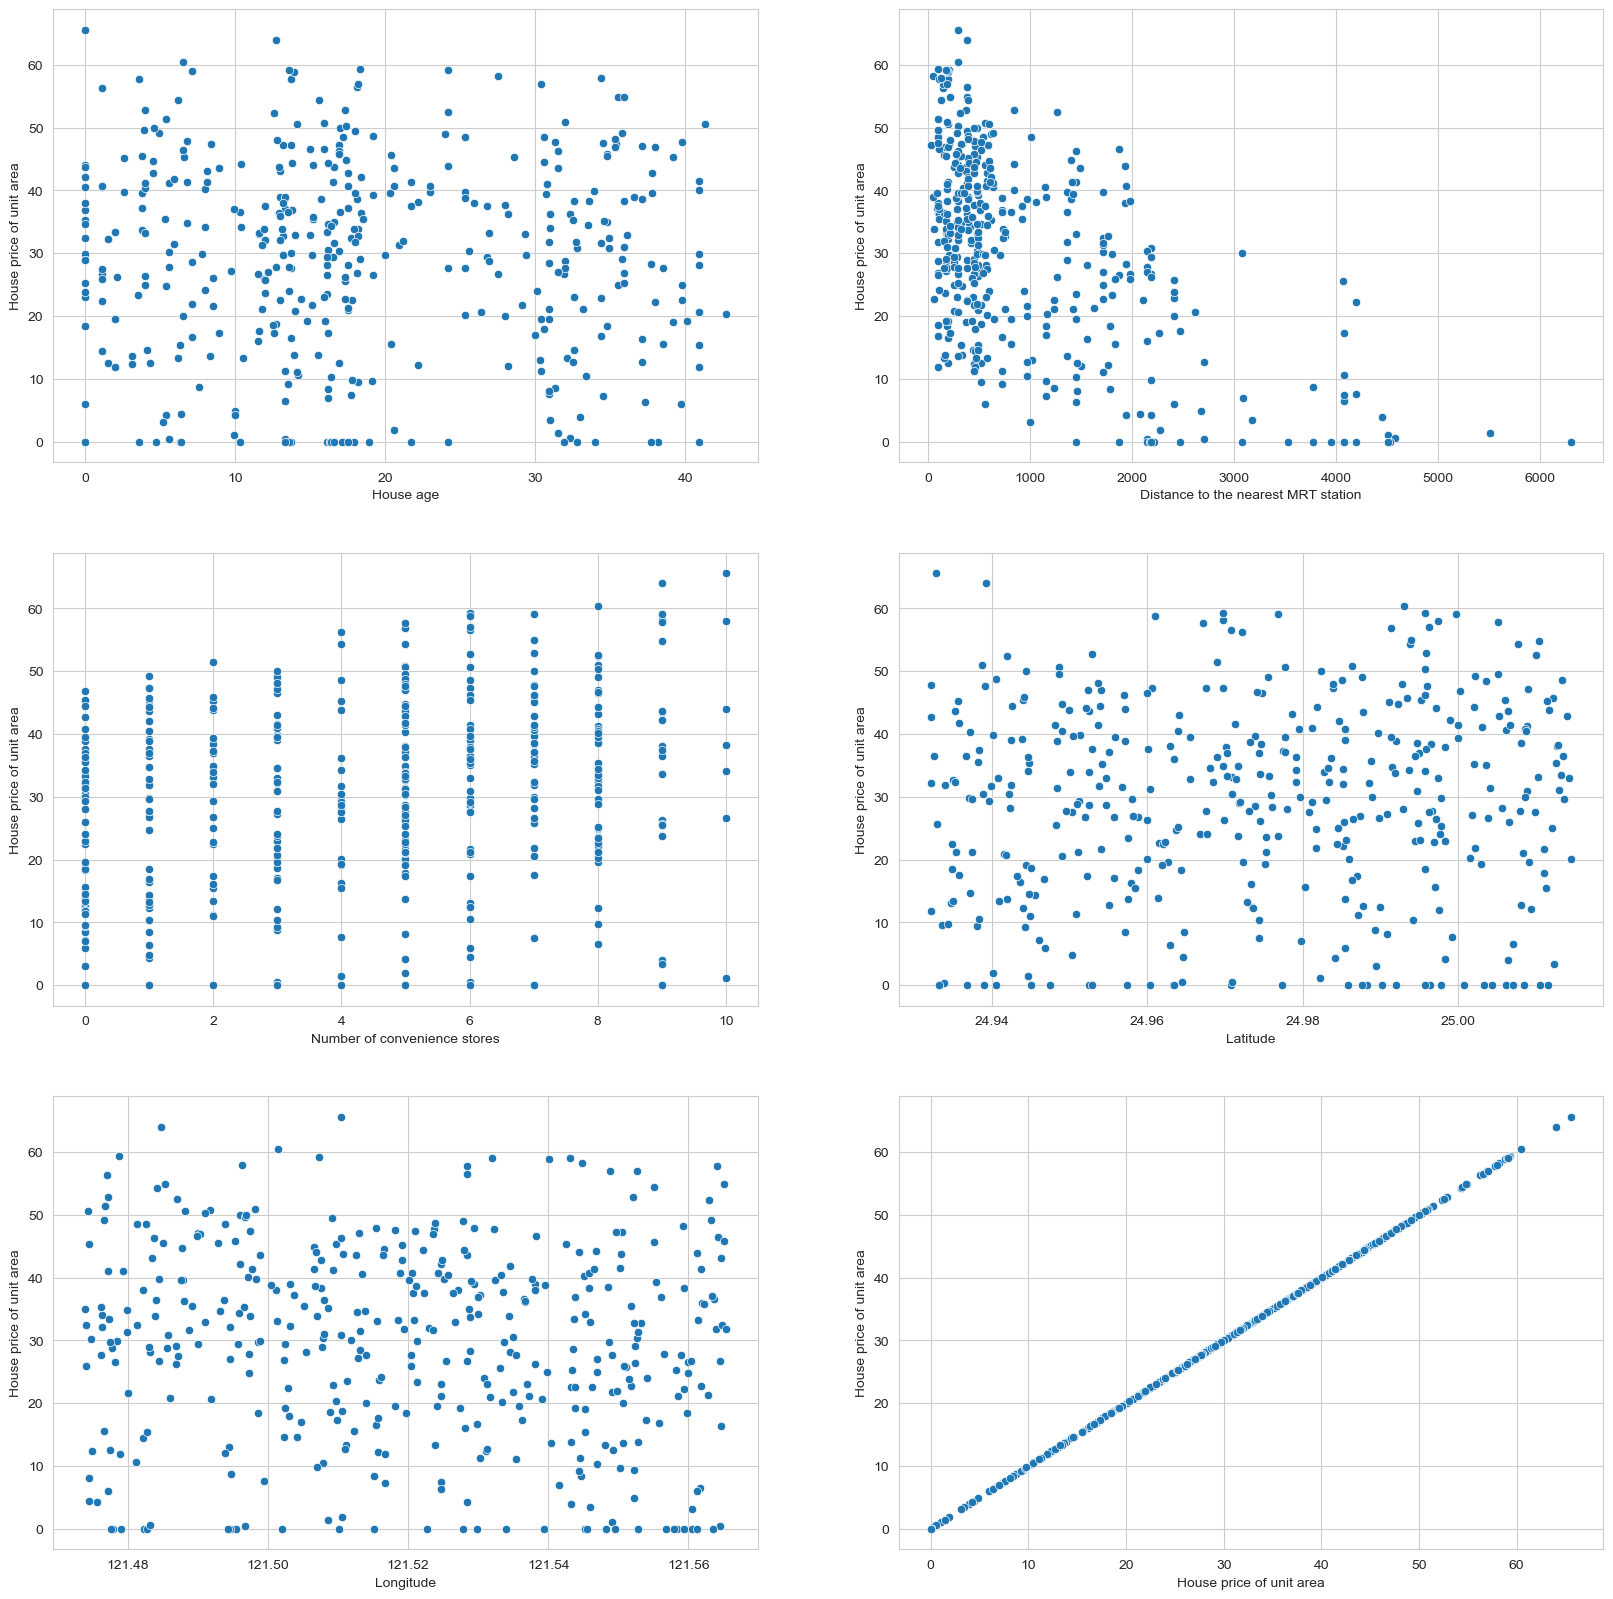

In [137]:
char = ['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']


sns.set_style('whitegrid')

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(20,20))

axes = axes.flatten()

for i,col in enumerate(char):
    sns.scatterplot(data=data, x=col, y= data['House price of unit area'], ax=axes[i])